In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv(r"hyderabad-salaried-employees-cleaned.csv")

In [7]:
data.head()

,name,company,role,experience,location,qualification1,qualification2,salary,category,experience_months,experience_year,salary_lac
0,MANISHA DAS,APOLLO HOSPITALS ENTERPRISES LIMITED,SENIOR EXECUTIVE-OPERATIONS,5 Year(s) 9 Month(s),Hyderabad/ Secunderabad,MBA/ PGDM,B.Pharm. (Pharmacy),Rs. 5.0 lacs,HYDERABAD-SALARIED,69.0,5.0,5.00
1,Madduri Srinivas,CTS,Associate Projects,6 Year(s) 8 Month(s),Hyderabad/ Secunderabad,B.Com. (Commerce),MCA/ PGDCA,Rs. 8.05 lacs,HYDERABAD-SALARIED,80.0,6.0,8.05
2,Vijay Thakur,Bank Of America,Assistant Manager NonVoice Operations,11 Year(s) 4 Month(s),Hyderabad/ Secunderabad,MBA/ PGDM,B.Com. (Commerce),Rs. 8.33 lacs,HYDERABAD-SALARIED,136.0,11.0,8.33
3,M R nagaraju,Telenor,territory sales manger,6 Year(s),Hyderabad/ Secunderabad,B.Com. (Commerce),MBA/ PGDM,Rs. 5.0 lacs,HYDERABAD-SALARIED,NaN,6.0,5.00
4,VenkataramanaiahDodda,Tata Consultancy Services Ltd,Project Leader/ Tech Lead,10 Year(s) 3 Month(s),Hyderabad/ Secunderabad,ME/ M.Tech./ MS (Engg/ Sciences),BE/ B.Tech (Engineering),Rs. 16.03 lacs,HYDERABAD-SALARIED,123.0,10.0,16.03


In [9]:
data.drop(["name","category","location","company","experience_months"],axis=1,inplace=True)

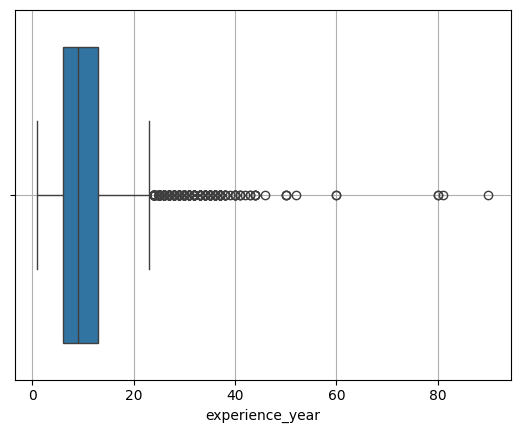

In [10]:
sns.boxplot(x="experience_year",data=data)
plt.grid()

In [11]:
data["experience_year"].describe()

count    10244.000000
mean        10.479695
std          6.387582
min          1.000000
25%          6.000000
50%          9.000000
75%         13.000000
max         90.000000
Name: experience_year, dtype: float64

In [12]:
data["salary_lac"].describe()

count    10247.000000
mean        11.580253
std         17.699775
min          5.000000
25%          6.240000
50%          8.500000
75%         13.000000
max        903.000000
Name: salary_lac, dtype: float64

<Axes: xlabel='experience_year', ylabel='salary_lac'>

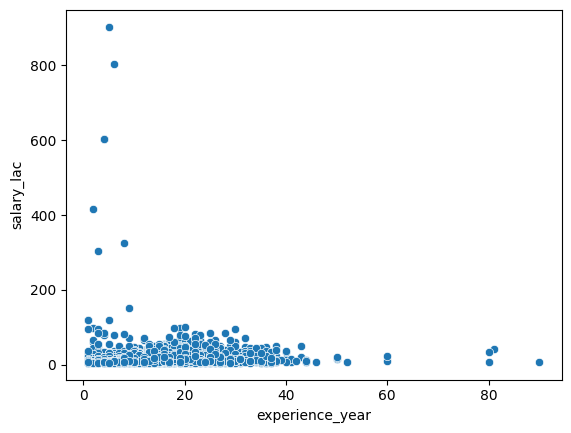

In [13]:
sns.scatterplot(x="experience_year",y="salary_lac",data=data)

In [14]:
data.shape

(10247, 7)

In [15]:
data=data[data['experience_year']<=20]

In [16]:
data.shape

(9537, 7)

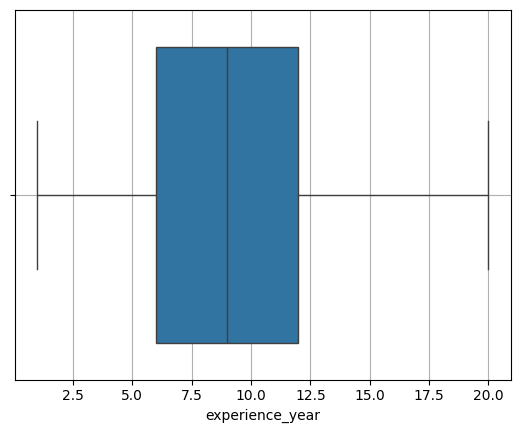

In [17]:
sns.boxplot(x="experience_year",data=data)
plt.grid()

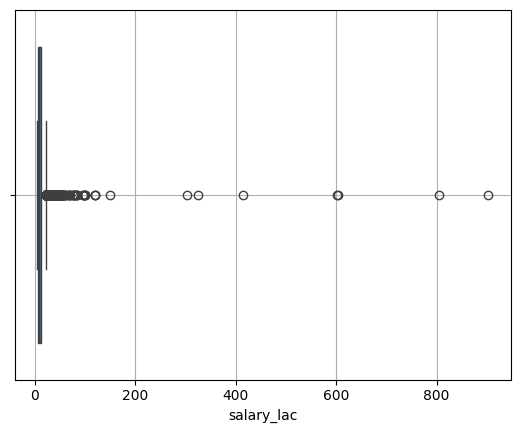

In [18]:
sns.boxplot(x="salary_lac",data=data)
plt.grid()

In [19]:
data=data[data['salary_lac']<15]

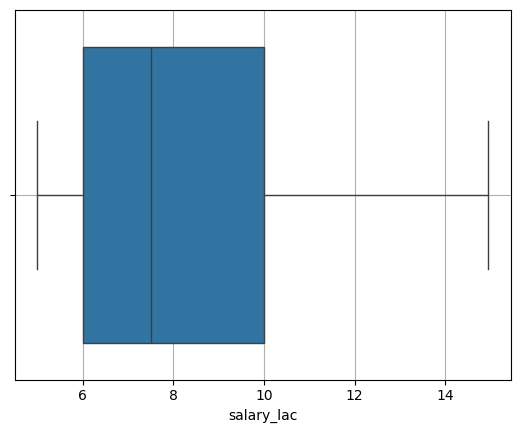

In [20]:
sns.boxplot(x="salary_lac",data=data)
plt.grid()

In [21]:
data["salary_lac"].max()

np.float64(14.95)

In [22]:
data.columns

Index(['role', 'experience', 'qualification1', 'qualification2', 'salary',
       'experience_year', 'salary_lac'],
      dtype='object')

In [23]:
data.head()

,role,experience,qualification1,qualification2,salary,experience_year,salary_lac
0,SENIOR EXECUTIVE-OPERATIONS,5 Year(s) 9 Month(s),MBA/ PGDM,B.Pharm. (Pharmacy),Rs. 5.0 lacs,5.0,5.00
1,Associate Projects,6 Year(s) 8 Month(s),B.Com. (Commerce),MCA/ PGDCA,Rs. 8.05 lacs,6.0,8.05
2,Assistant Manager NonVoice Operations,11 Year(s) 4 Month(s),MBA/ PGDM,B.Com. (Commerce),Rs. 8.33 lacs,11.0,8.33
3,territory sales manger,6 Year(s),B.Com. (Commerce),MBA/ PGDM,Rs. 5.0 lacs,6.0,5.00
5,Training Manager,10 Year(s),B.Sc. (Science),MBA/ PGDM,Rs. 7.2 lacs,10.0,7.20


---------------------------------------------------------------------------------------------------------------------------------------------------

In [24]:
X = data[["experience_year","salary_lac"]]

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()

In [27]:
X_scaled = scaler.fit_transform(X)

In [28]:
X_scaled

array([[-0.88227176, -1.20286402],
       [-0.63118745, -0.02288152],
       [ 0.62423415,  0.08544474],
       ...,
       [-0.12901881, -0.39041706],
       [-1.88660904, -0.0422255 ],
       [-0.88227176, -1.18352004]], shape=(7872, 2))

<Axes: xlabel='salary_lac', ylabel='experience_year'>

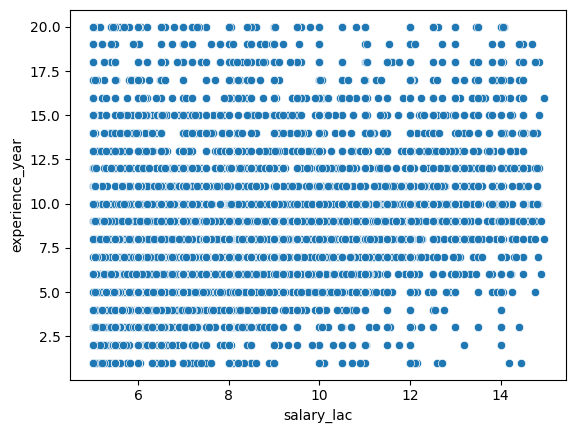

In [29]:
sns.scatterplot(x="salary_lac",y="experience_year",data=data)

In [30]:
from sklearn.cluster import KMeans

In [31]:
inertia = []

In [32]:
for i in range(2,11):
    km = KMeans(n_clusters=i,random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

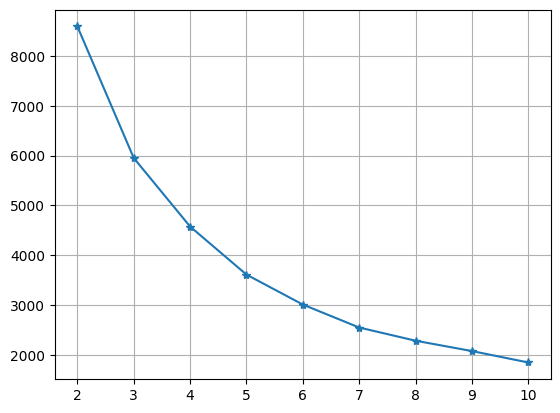

In [33]:
plt.plot(range(2,11),inertia,marker="*")
plt.grid()

In [34]:
km = KMeans(n_clusters=4,random_state=42)

In [35]:
data["clusters"] = km.fit_predict(X_scaled)

<Axes: xlabel='salary_lac', ylabel='experience_year'>

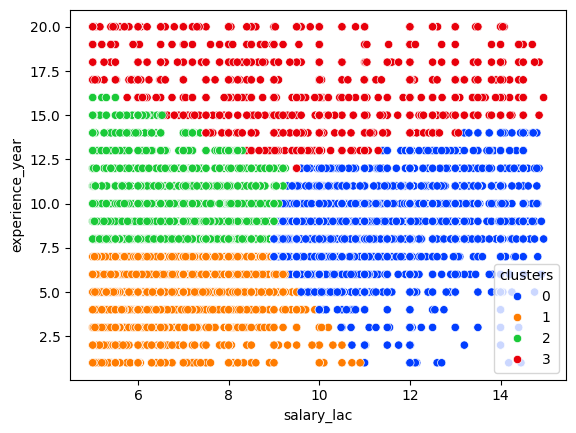

In [36]:
sns.scatterplot(x="salary_lac",y="experience_year",hue="clusters",palette="bright",data=data)

#### 